# Astronomy 8824 - Problem Set 2
The goal of this problem set is to integrate orbits in various potentials. 

This problem set was developed by David Weinberg, with some modifications by Paul Martini.

Creating good plots to show your work is a non-trivial part of this assignment, and I encourage you use the matplotlib examples to get started.

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import display, Math

# matplotlib settings 
SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('lines', linewidth=2)
plt.rc('axes', linewidth=2)
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)   # fontsize of the figure title

In [2]:
# Routines from DHW, modified by PM for notebook

def accelerate(pot,x,y,qh=1):
    """
    Compute acceleration of a particle
    pot = 1 for Kepler, 2 for H.O.
    x, y = particle position
    returns accelerations xdd, ydd
    """

    if (pot==1):
        r=np.sqrt(x**2+y**2)
        xdd= -x/r**3
        ydd= -y/r**3
    elif (pot==2):
        xdd= -x
        ydd= -y/(qh)**2
    else:
        raise ValueError ("Invalid potential type")

    return([xdd,ydd])

def potential(pot,x,y,qh=1):
    """
    Compute potential energy (per unit mass)
    pot = 1 for Kepler, 2 for H.O.
    x, y = particle position
    returns potential phi
    """

    if (pot==1):
        phi=-1/np.sqrt(x**2+y**2)
    elif (pot==2):
        phi=0.5*(x**2+(y/qh)**2)                # Harmonic Oscillator
    else:
        raise ValueError ("Invalid potential type")

    return(phi)

In [3]:
### Routines for plotting 

def add_axtitle(axes, label):
    '''
    Helper routine to add titles above subplot panels
    
    Parameters
    ----------
        axes : matplotlib axes instance
        label : string
    '''
    ylim = axes.get_ylim()
    ylab = ylim[0] + 1.02*(ylim[1]-ylim[0])
    xlim = axes.get_xlim()
    xlab = xlim[0] + 0.1*(xlim[1]-xlim[0])
    axes.text(xlab, ylab, label, fontsize=14)
    
def plot4xy(coords4, limit, labels4, toplabel): 
    '''
    Create a 4-panel plot of the orbits for 4 calculations 
    
    Parameters
    ----------
        coords4 : list
            list with 4 dictionaries that are output from orbit_euler or orbit_leapfrog
        limit : float
            plot range (-limit, limit) for x and y axes
        labels4 : list
            list of 4 strings to label each panel
        toplabel : string
            title of plot
    '''

    fig, axarr = plt.subplots(nrows=2, ncols=2, figsize=(12,12), sharex=True, sharey=True)
    plt.subplots_adjust(wspace=0.1, hspace=0.1)
    xlab = -0.83*limit
    ylab = .83*limit

    axarr[0,0].plot(coords4[0]['x'], coords4[0]['y'])
    axarr[0,0].set_xlim(-1*limit, limits)
    axarr[0,0].set_ylim(-1*limit, limits)
    add_axtitle(axarr[0,0], labels4[0])

    axarr[0,1].plot(coords4[1]['x'], coords4[1]['y'])
    add_axtitle(axarr[0,1], labels4[1])

    axarr[1,0].plot(coords4[2]['x'], coords4[2]['y'])
    add_axtitle(axarr[1,0], labels4[2])

    axarr[1,1].plot(coords4[3]['x'], coords4[3]['y'])
    add_axtitle(axarr[1,1], labels4[3])

    ax_main = fig.add_axes([.1, .1, 0.8, 0.8], frameon=False, xticks=[], yticks=[])
    ax_main.set_xlabel("X", fontsize=18)
    ax_main.set_ylabel("Y", fontsize=18)
    ax_main.set_title(toplabel, fontsize=20)
    
def plot3body(params, out):
    
    '''
    Plotting code for Part 3: Planet and Moon
    
    Parameters
    ----------
    params : dict
        Dictionary of parameter values
            params['m1'] : mass of body 1 (planet)
            params['m2'] : mass of body 2 (moon)
            params['x2'] : position of body 2
            params['ydot1'] : initial y velocity of body 1
            params['ydot2'] : initial y velocity of body 2
            params['dtout'] : output time step
            params['tmax'] : maximum time 
            params['tstep'] : calculation time step
    out : dict
        Dictionary of 1-d float arrays: 
            out['t'] : time 
            out['x1'] : x positions for body 1
            out['y1'] : y positions for body 1
            out['x2'] : x positions for body 2
            out['y2'] : y positions for body 2
            out['x3'] : x positions for body 3
            out['y3'] : y positions for body 3
            out['de'] : change in energy
    '''

    # Calculate the period of the planet orbit
    Pplanet = 2.*out['t'][np.where(out['y2'] < 0.)][0]

    # Create masks for each planet orbit
    tp1mask = out['t'] < Pplanet
    tp2mask = (out['t'] >= Pplanet) 
    tp2mask = tp2mask*(out['t'] < 2*Pplanet)
    tp3mask = (out['t'] >= 2*Pplanet) 
    tp3mask = tp3mask*(out['t'] < 3*Pplanet)
    tp4mask = (out['t'] >= 3*Pplanet) # >= 3 orbits of the planet

    # Main panel
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
    tlabel = "m$_p$ = {0:.2f}, m$_m$ = {1:.4f}, x$_m$ = {2:.2f}, $\.y_p/v_c$ = {3:.2f}, $\.y_m/y_c$ = {4:.2f}".format(params['m1'], params['m2'], params['x2'], params['ydot1'], params['ydot2'])
    ax.set_title(tlabel, fontsize=16)
    Plabel = "T$_p$ = {0:.4f}".format(Pplanet)
    ax.text(-1.8, 1.8, Plabel, fontsize=16)
    maxlabel = "t$_m$ = {0:.1f}".format(params['tmax'])
    ax.text(-1.8, 1.65, maxlabel, fontsize=16)
    # Draw the orbits
    ax.plot(out['x1'], out['y1'], 'b', label='Star', lw=1)
    ax.plot(out['x2'], out['y2'], 'k', label='Planet', lw=1)
    ax.plot(out['x3'][tp1mask], out['y3'][tp1mask], 'r', label='Moon Orbit 1', lw=1)
    ax.plot(out['x3'][tp2mask], out['y3'][tp2mask], 'lime', label='Moon Orbit 2', lw=1)
    ax.plot(out['x3'][tp3mask], out['y3'][tp3mask], 'chocolate', label='Moon Orbit 3', lw=1)
    ax.plot(out['x3'][tp4mask], out['y3'][tp4mask], 'cyan', label='Moon Orbit 4+', lw=1)
    ax.set_xlim(-2, 2)
    ax.set_ylim(-2, 2)
    ax.legend(loc='lower left')
    ax.set_xlabel('X', fontsize=16)
    ax.set_ylabel('Y', fontsize=16)

    # Add a panel that zooms in on the moon --
    ax_moon = fig.add_axes([.7, .7, .15, .15])
    ax_moon.set_title("Moon Orbit", fontsize=14)
    x_moon = out['x3'] - out['x2']
    y_moon = out['y3'] - out['y2']
    ax_moon.plot(x_moon[tp1mask], y_moon[tp1mask], 'r')
    ax_moon.plot(x_moon[tp2mask], y_moon[tp2mask], 'lime')
    ax_moon.plot(x_moon[tp3mask], y_moon[tp3mask], 'chocolate')
    ax_moon.plot(x_moon[tp4mask], y_moon[tp4mask], 'cyan')
    val = 1.25*np.abs(1.-params['x2'])
    ax_moon.set_xlim(-1.*val, val)
    ax_moon.set_ylim(-1.*val, val)

    # Add a panel that zooms in on the planet -- 
    ax_planet = fig.add_axes([.7, .15, .15, .15])
    ax_planet.set_title("Planet Orbit", fontsize=14)
    ax_planet.plot(out['x1'], out['y1'], 'b')
    ax_planet.plot(out['x2'], out['y2'], 'k')
    ax_planet.plot(out['x3'][tp1mask], out['y3'][tp1mask], 'r')
    ax_planet.plot(out['x3'][tp2mask], out['y3'][tp2mask], 'lime')
    ax_planet.plot(out['x3'][tp3mask], out['y3'][tp3mask], 'chocolate')
    ax_planet.plot(out['x3'][tp4mask], out['y3'][tp4mask], 'cyan')
    ax_planet.set_xlim(1.-2.*val, 1.+2*val)
    ax_planet.set_ylim(-2.*val, 2.*val)

## 1. Kepler Potential

Consider a 2-d Kepler potential generated by a central point mass M. Adopt units G = M = 1 so that
$$
\Phi(r)=-\frac{1}{r}
$$
In these units, what is the circular velocity $v_c$ at r = 1? What is the orbital period for an orbit with semi-major axis a = 1? If we convert to physical units adopting M = 1 M$_\odot$ and a length unit of 1 AU, what is the time unit in years (i.e. what does an interval dt = 1 in system units correspond to in years)? 

In [4]:
### Answer

Now write a program to integrate test particle orbits in this potential, in Cartesian coordinates. 

First implement this with the Euler method, where you update positions and velocities from time $t_i$ to $t_{i+1} = t_i + \Delta t$ using:

$$
x_{i+1} = x_i + v_i \Delta t
$$
$$
v_{i+1} = v_i - \nabla \Phi(x_i) \Delta t
$$

You may use this orbit_euler() function as a starting point, and the plotting script to illustrate your results. Below is an illustration of how to use it.

In [5]:
def orbit_euler(params):
    '''
    Orbit calculation via the Euler Method
    Routine by DHW, modified by PM for notebook I/O
    
    Parameters
    ----------
    params : dict
        Dictionary of parameter values
            params['xinit'] : initial x value
            params['yinit'] : initial y value
            params['xdotinit'] : initial x velocity
            params['ydotinit'] : initial y velocity
            params['tmax'] : maximum time
            params['dtout'] : output time step
            params['tstep'] : calculation time step
            params['pot_type'] : potential type (1 = Kepler, 2 = H.O.)
        
    Returns
    -------
    out : dict
        Dictionary of 1-d float arrays: 
            out['t'] : time 
            out['x'] : x positions
            out['y'] : y positions
            out['xdot'] : x velocities
            out['ydot'] : x velocities
            out['de'] : change in energy
    '''
    
    x = params['xinit']
    y = params['yinit']
    xdot = params['xdotinit']
    ydot = params['ydotinit']    
    tmax = params['tmax']
    dtout = params['dtout']
    tstep = params['tstep']
    pot_type = params['pot_type']

    i = 0
    t = 0.0
    de = 0    

    # Define arrays to hold the output
    N_out = int(tmax / dtout) 
    t_out = np.arange(0, tmax, dtout)
    x_out = np.zeros(len(t_out), dtype=float)
    y_out = np.zeros(len(t_out), dtype=float)
    xdot_out = np.zeros(len(t_out), dtype=float)
    ydot_out = np.zeros(len(t_out), dtype=float)
    de_out = np.zeros(len(t_out), dtype=float)

    # Store initial values
    t_out[i] = 0.0
    x_out[i] = x
    y_out[i] = y
    xdot_out[i] = xdot
    ydot_out[i] = ydot
    de_out[i] = 0.
    e0 = potential(pot_type, x, y, qh=params['qh']) + 0.5*(xdot**2 + ydot**2)
    tnext = dtout

    i=1
    while (t<tmax):
        xdd, ydd = accelerate(pot_type, x, y, qh=params['qh'])
        x+=xdot*tstep
        y+=ydot*tstep
        xdot+=xdd*tstep
        ydot+=ydd*tstep
        t+=tstep

        if (t>=tnext and t < tmax):
            # print(t, i)
            energy=potential(pot_type, x, y, qh=params['qh']) + 0.5*(xdot**2 + ydot**2)
            de_out[i]=(energy-e0)/np.abs(e0)
            # print('%8.5f %7.3f %7.3f %8.2f %8.2f %7.4e' % (t,x,y,xdot,ydot,de))
            t_out[i] = t
            x_out[i] = x
            y_out[i] = y
            xdot_out[i] = xdot
            ydot_out[i] = ydot
            tnext+=dtout
            i+=1
            
    # Put output in a dictionary
    out = {}
    out['t'] = t_out
    out['x'] = x_out
    out['y'] = y_out
    out['xdot'] = xdot_out
    out['ydot'] = ydot_out
    out['de'] = de_out
    return out                                               

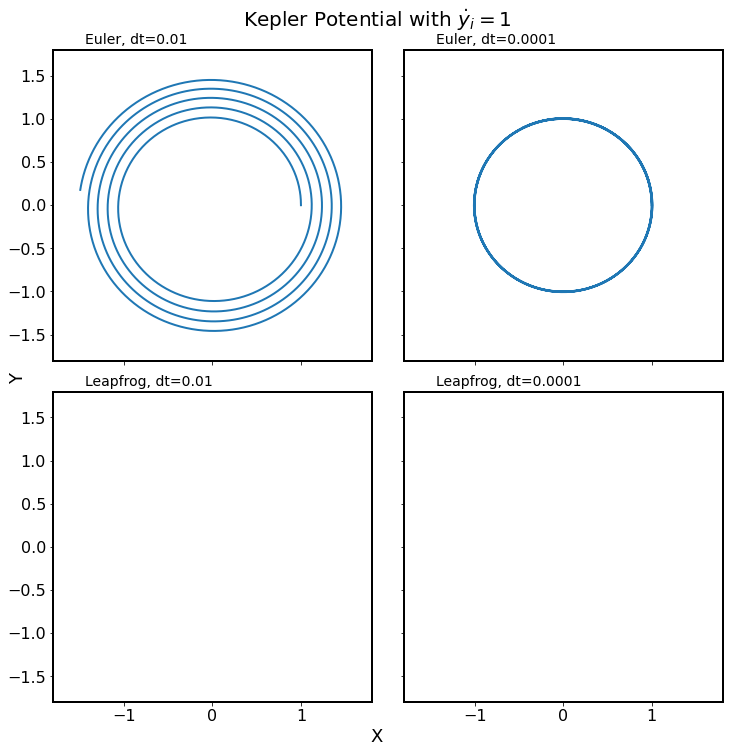

In [6]:
### Illustration of how to use orbit_euler() and plot4xy()

p1param = {}
p1param['dtout'] = 0.02
p1param['tmax'] = 40.
p1param['xinit'] = 1.
p1param['yinit'] = 0.
p1param['xdotinit'] = 0.
p1param['ydotinit'] = 1.
p1param['pot_type'] = 1
p1param['qh'] = 0.

# Case 1 
p1param['tstep'] = 1.e-2
e1out = orbit_euler(p1param)
e1label = "Euler, dt={0:.2f}".format(p1param['tstep'])

# Case 3
# lf1out = orbit_leapfrog(p1param)
# next 3 lines are dummy values to illustrate the plotting script
lf1out = {}
lf1out['x'] = 0.
lf1out['y'] = 0.
lf1label = "Leapfrog, dt={0:.2f}".format(p1param['tstep'])

# Case 2
p1param['tstep'] = 1.e-4
e2out = orbit_euler(p1param)
e2label = "Euler, dt={0:.4f}".format(p1param['tstep'])

# Case 4
# lf2out = orbit_leapfrog(p1param)
# next 3 lines are dummy values to illustrate the plotting script
lf2out = {}
lf2out['x'] = 0.
lf2out['y'] = 0.
lf2label = "Leapfrog, dt={0:.4f}".format(p1param['tstep'])

coords = [e1out, e2out, lf1out, lf2out]
labels = [e1label, e2label, lf1label, lf2label]
limits = 1.8
toplabel = "Kepler Potential with $\.y_i = 1$"
plot4xy(coords, limits, labels, toplabel)

Next modify the Euler program to implement the leapfrog method, where you evaluate the velocities at half-integer timesteps:
$$
x_{i+1}=x_i + v_{i+1/2} \Delta t
$$
$$
v_{i+3/2} = v_{i+1/2}- \nabla \Phi(x_{i+1}) \Delta t 
$$

Remember that in this case you need to take the first half time-step to evaluate $v_{1/2}$ – don’t just set $v_{1/2} = v_0$.

Start with a test particle at $x=1, y=0, \dot x=0, \dot y=1$. Integrate the orbits up to $t=40$ with both methods, first with a timestep $\Delta t = 0.01$, then with a timestep $\Delta t = 0.0001$.

Plot the orbits for the two methods and two integration steps. Also evaluate the energy 

$$
E = \frac{1}{2} v^2+\Phi(\vec x) 
$$

and make plots showing the level of energy conservation for the four cases.  What other conserved quantity could you use as a check of your integration accuracy?


In [7]:
### Answer

Repeat with initial velocity $\dot{y}=0.5$ and $\dot{y}=0.2$. Include plots for all three values of $\dot{y}$ with your solution.

In [8]:
### Answer

Comment briefly on the impact of timestep and the difference between Euler and leapfrog integration.

Here are a few issues to consider in your coding and plotting. Rather than get output every timestep, you will want to code so that you can separately specify how often you get outputs; you probably don't need 400,000 outputs for the $\Delta t = 0.0001$ case. When using the leapfrog integration, you need to take an extra half step to synchronize the position and velocity to the same time before evaluating the energy at your output time (this is another reason you don't want output at every timestep).  Be sure this is just a temporary evaluation; you want to get velocities back on the 1/2 timesteps when you go back to orbit integration. If you plot y vs. x with the same range and the same units, your plot panels should be square so that the shape of the orbit is faithful. If you let your plotting code automatically select axis ranges based on the variation in your quantities, then it will make even highly elliptical orbits appear circular, and only reading the axis values will reveal their ellipticity – very bad practice! Where practical, if you're comparing different cases (e.g., different timestep choices) keep the same axis ranges so that one can visually evaluate the comparison; in some cases, like energy conservation that varies by orders-of-magnitude from one case to another, this won't be a useful approach. Label your plots well so that it is evident what case you are showing. My matplotlib example plot4xy() shows one way to make such plots.

In [9]:
### Answer

## Part 2: Harmonic Oscillator Potential

Now consider a potential
$$
\Phi(\vec x) = {x^2 \over 2} +  {y^2 \over 2 q^2}.
$$

Using the leapfrog integrator with $\Delta t = 0.0001$, integrate and plot orbits for $q=1$, $q=0.9$, and $q=0.6$,
always starting at $x=1$, $y=0$, $\dot{x}=0$, with initial $y$-velocities $\dot{y}=1$ and $\dot{y}=0.5$. Create a 6-panel plot that shows the orbits for these six cases. One way to do this is to adopt the plot4xy() routine to display all six.

For the case $q=0.9$, $\dot{y}=0.5$, compare the energy conservation of the Euler and leapfrog methods for
$\Delta t = 0.01$, 0.001, and 0.0001. You don't need to include plots of the orbits for these other cases, but do some spot checks to see whether the orbit is visibly different from leapfrog with $\Delta t = 0.01$.

In [10]:
### Answer

## Part 3: Planet and Moon

Adapt your leapfrog integration program to integrate the orbits of three bodies interacting gravitationally.

The most massive body, the star, should have a mass $M_s=1$ and start at rest at position $(x,y)=(0,0)$.

The next most massive body, the planet, should have a mass $M_p$ and start at position $(x,y)=(1,0)$ with an initial velocity $\dot{y}_p$ in the $+y$ direction.  As in Part I, $\dot{y}_p=1$ corresponds to a circular orbit for the planet, provided the perturbing effect of the third body can be ignored.

The third body, the moon, should have a mass $M_m$ and start at position $(x_m,0)$ with an initial velocity $\dot{y}_m$ in the $+y$ direction.

Before you start integrating, you should subtract the center-of-mass velocity from all 3 bodies, so that you work in a frame in which the center-of-mass stays fixed.  Otherwise, your bodies will just drift off the edge of any plot you make.

For the calculations in this part use $\Delta t = 10^{-4}$ as a default, though you may want to experiment with larger or smaller timesteps in some cases.

First consider cases with $M_p=0.1$ and $M_m=0.01$.  Note that if we imagine $M_s=1 M_\odot$, then the *planet* here is really a star at the bottom of the main sequence and the *moon* is a brown dwarf 10 times the mass of Jupiter!

Suppose that $x_m=1.05$.  What initial value of $\dot{y}_m$ is required for the moon to be in an approximately circular orbit about the planet?  (Think about which frames are relevant.) 

### 3.1 Integrate and plot the case $M_p=0.1$ and $M_m=0.01$.  

I recommend you use my plot3body() function (above). Some nice features are that it plots the position of the moon relative to the planet in an inset window; it plots a zoom around the initial position in another starting window to show perturbations of the planet orbit; and it changes the line color used for the moon's orbit each time the planet completes one orbital period, making it much easier to decode what is happening over time.  Note that in the plotting script the initial $\dot{y}_m$ of the moon is specified _relative_ to the planet and it is in units of the velocity $v_c$ required for a circular orbit at the planet-moon separation (ignoring the star).  The conversion to a $\dot{y}_m$ in system units in the star's frame is within the python integration script.


In [11]:
### Answer

In [12]:
### Code stub to demonstrate input and output

def orbit_3body(params, moon=False):
    '''
    
    Parameters
    ----------
    params : dict
        Dictionary of parameter values
            params['m1'] : mass of body 1 (planet)
            params['m2'] : mass of body 2 (moon)
            params['x2'] : position of body 2
            params['ydot1'] : initial y velocity of body 1
            params['ydot2'] : initial y velocity of body 2
            params['dtout'] : output time step
            params['tmax'] : maximum time 
            params['tstep'] : calculation time step
        moon : bool
            True means ydot1, ydot2 are in units of v_{c,1}, v_{c,2}
        
    Returns
    -------
    out : dict
        Dictionary of 1-d float arrays: 
            out['t'] : time 
            out['x1'] : x positions for body 1
            out['y1'] : y positions for body 1
            out['x2'] : x positions for body 2
            out['y2'] : y positions for body 2
            out['x3'] : x positions for body 3
            out['y3'] : y positions for body 3
            out['de'] : change in energy
    '''
    
    # Your code here
    
    out = {}
    out['t'] = t_out
    out['x1'] = x1_out
    out['y1'] = y1_out
    out['x2'] = x2_out
    out['y2'] = y2_out
    out['x3'] = x3_out
    out['y3'] = y3_out
    out['de'] = de_out
    
    return out

In [13]:
### Answer 

### 3.2 Calculate and plot the case with $x_m=1.1$.

Again use $\dot{y}_p=1$ and $\dot{y}_m$ chosen to put the moon in a circular orbit about the planet.

In [14]:
### Answer 

### 3.3 Repeat for $x_m=1.2$.

Comment on the results for these three cases. At what separation is the orbit of the moon no
longer well described as a circular orbit centered on the moving planet? Can you explain the value of this critical separation physically? (Hint: think about tidal forces.)

In [15]:
### Answer

### 3.4 Go back to $x_m=1.05$, but now set $\dot{y}_p=0.7$, so the planet is in an elliptical orbit.  Compute, plot, and comment.

In [16]:
### Answer

### 3.5 Set $\dot{y}_p=1$ but choose the moon velocity relative to the planet to be $0.7 v_c$ -- i.e., 70\% of the velocity required to put the moon in a circular orbit.  Compute, plot, comment.

In [17]:
### Answer

### 3.6, 3.7  Increase to $x_m=1.10$ and try a retrograde orbit for the moon (negative $\dot{y}_m$), first at the circular speed, then at 70\% of the circular speed.  Compute, plot, comment.

In [18]:
### Answer 

### 3.8, 3.9, 3.10 Finally, consider a lighter planet and moon: $M_p=0.01$, $M_m=0.0001$.  Do just the cases with $\dot{y}_p=1$ and a circular orbit for the moon, setting $x_m=1.05$ $1.08$, $1.10$.  Comment on the similarities and differences from the case with $M_p=0.1$, $M_m=0.01$.


In [19]:
### Answer 

## Part IV: The Three-Body Problem

_Time permitting_, experiment with cases in which all three bodies have equal mass.  You may need shorter timesteps for some cases.

See if you can set up a "hierarchical triple," in which a distant tertiary star orbits in an approximately circular orbit around a tight inner binary.

After that, play around and see what you find.  Include plots of your most interesting results and interpret them.

An interesting set of controlled cases is to set up an inner binary in an approximately circular orbit, then "drop in" a third body from different distances along the $+x$ axis, always setting its initial $\dot{y}$ equal to that of the binary center-of-mass so that the third body drops straight down the $x$-axis.

In [20]:
### Answer